## Läs in fil och spara det i olika variabler 
ändra column namn 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in filerna
df_svenska = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Svenska")
df_engelska = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Engelska")
df_matematik = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Matematik")
df_sva = pd.read_excel("visualiseringar\\riket2023_åk9_np (1).xlsx", skiprows=8, sheet_name="Svenska som andraspråk")

# Byt kolumnnamn så de blir lättare att förstå
columns = ["Plats", "Huvudman", "Totalt_A_F", "Flickor_A_F", "Pojkar_A_F",
           "Totalt_A_E", "Flickor_A_E", "Pojkar_A_E", "Totalt_poäng", "Flickor_poäng", "Pojkar_poäng"]

df_svenska.columns = columns
df_engelska.columns = columns
df_matematik.columns = columns
df_sva.columns = columns 

# Konverterar "Totalt_poäng" till numeriska värden
df_svenska["Totalt_poäng"] = pd.to_numeric(df_svenska["Totalt_poäng"], errors="coerce")
df_engelska["Totalt_poäng"] = pd.to_numeric(df_engelska["Totalt_poäng"], errors="coerce")
df_matematik["Totalt_poäng"] = pd.to_numeric(df_matematik["Totalt_poäng"], errors="coerce")
df_sva["Totalt_poäng"] = pd.to_numeric(df_sva["Totalt_poäng"], errors="coerce")



C:\Users\salih\AppData\Local\Temp\ipykernel_8928\4236130458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hej2[0, 0].set_xticklabels(df_svenska["Huvudman"], rotation = 45)


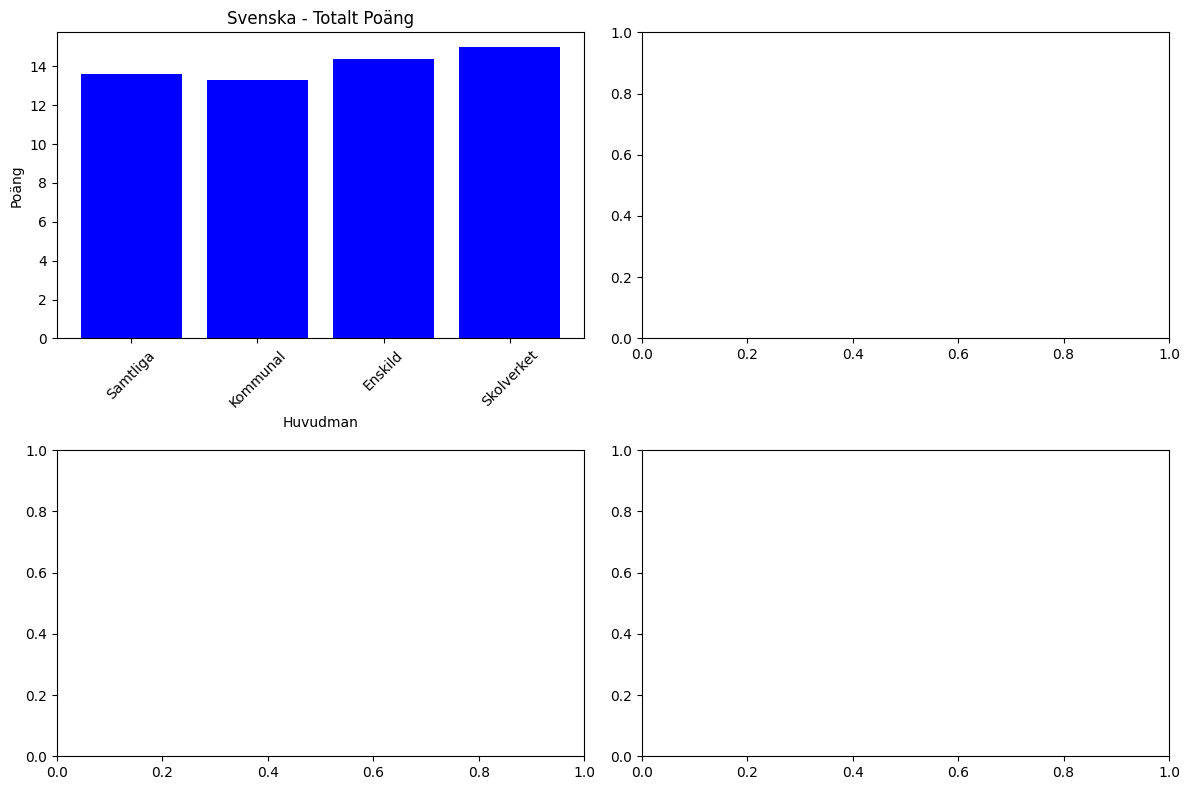

In [ ]:
# Skapar en 2x2 subplot för alla ämnen 
test, hej2 = plt.subplots(2, 2, figsize = (12,8))

hej2[0, 0].bar(df_svenska["Huvudman"], df_svenska["Totalt_poäng"], color ="blue")
hej2[0, 0].set_title("Svenska - Totalt Poäng")
hej2[0, 0].set_xlabel("Huvudman")
hej2[0, 0].set_ylabel("Poäng")
hej2[0, 0].set_xticklabels(df_svenska["Huvudman"], rotation = 45)
